In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get cryptos dataset
df = pd.read_csv('cryptos.csv')

In [3]:
# columns of dataset
df = df[['Crypto', 'Date', 'Open', 'Low', 'High', 'Close', 'Volume', 'Market Cap', ]]

In [4]:
#change the date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
# Check if there is any null value
df.isnull().sum()

Crypto        0
Date          0
Open          0
Low           0
High          0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [6]:
df.describe()

,Open,Low,High,Close,Volume,Market Cap
count,19131.000000,19131.000000,19131.000000,19131.000000,1.913100e+04,1.913100e+04
mean,761.444392,738.682495,783.436833,763.837914,3.975340e+09,1.853319e+10
std,3199.816505,3084.525401,3309.109959,3215.509484,1.222030e+10,5.932182e+10
min,0.001352,0.001227,0.001509,0.001357,0.000000e+00,0.000000e+00
25%,0.206962,0.200160,0.218245,0.207531,3.635380e+06,2.346223e+08
50%,1.687292,1.621860,1.781262,1.695490,1.349885e+08,2.448265e+09
75%,74.700625,72.283853,77.416730,74.837289,1.821590e+09,9.560998e+09
max,57532.738864,55672.609513,58330.572142,57539.943668,3.509679e+11,1.072263e+12


In [7]:
# Consider the dataset that contains only last 30 days
last_month_end = np.max(df['Date'])
last_month_start = last_month_end - datetime.timedelta(30)

In [8]:
new_df = df[df['Date'] > last_month_start]

In [9]:
new_df.describe()

,Open,Low,High,Close,Volume,Market Cap
count,300.000000,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02
mean,4716.097206,4537.129486,4898.565478,4753.284602,2.942375e+10,1.199415e+11
std,13680.313980,13152.946432,14193.260865,13773.175728,4.578569e+10,2.516386e+11
min,0.282152,0.279825,0.336867,0.305702,5.125454e+08,6.802946e+09
25%,0.885879,0.825905,0.936482,0.902019,3.538339e+09,1.209396e+10
50%,26.960933,24.776142,28.890621,27.344975,7.718615e+09,2.319452e+10
75%,216.238969,195.502475,228.589628,216.242812,3.597193e+10,3.495600e+10
max,57532.738864,55672.609513,58330.572142,57539.943668,3.509679e+11,1.072263e+12


In [10]:
crypto_group = new_df.groupby('Crypto')


In [11]:
avg_market = crypto_group['Market Cap'].agg(np.mean)
avg_market = avg_market.sort_values(ascending = False)
#avg_market = new_df['Market Cap']
#x = new_df['Crypto']
#new_df['Crypto'].value_counts()
avg_market

Crypto
Bitcoin      8.469910e+11
Ethereum     1.922063e+11
Tether       3.119700e+10
Cardano      2.584187e+10
Polkadot     2.482554e+10
Binance      2.319925e+10
XRP          2.210151e+10
Litecoin     1.214519e+10
ChainLink    1.142647e+10
Stellar      9.480475e+09
Name: Market Cap, dtype: float64

In [12]:
if crypto_group['Crypto'] == 'Bitcoin':
    print(crypto_group['Market Cap'])

Text(0.5, 1.0, 'Market Cap of most recent month')

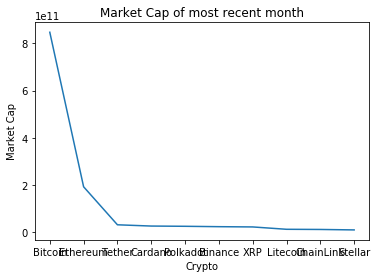

In [13]:
# The plot between the market cap and the cryptos 
plt.plot(avg_market)
#avg_market.plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Crypto')
plt.ylabel('Market Cap')
plt.title('Market Cap of most recent month')

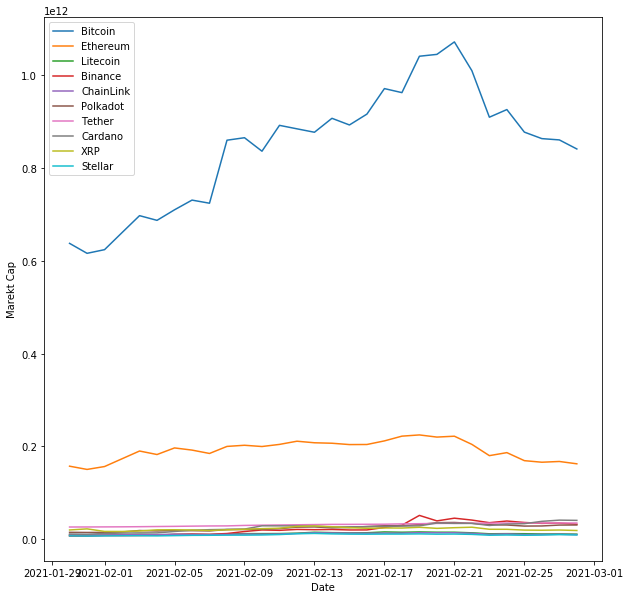

In [14]:
# A plot between market cap and dates with respect to cryptos
x= new_df['Date'].unique()
crypto = ['Bitcoin','Ethereum', 'Litecoin','Binance','ChainLink','Polkadot','Tether','Cardano','XRP','Stellar']

for i in range(len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            y.append(new_df.iloc[j,7])
    
    plt.plot(x,y,label=crypto[i])    

plt.xlabel('Date')
plt.ylabel('Marekt Cap')
plt.legend()
plt.rcParams["figure.figsize"] = (11,5)
plt.show()


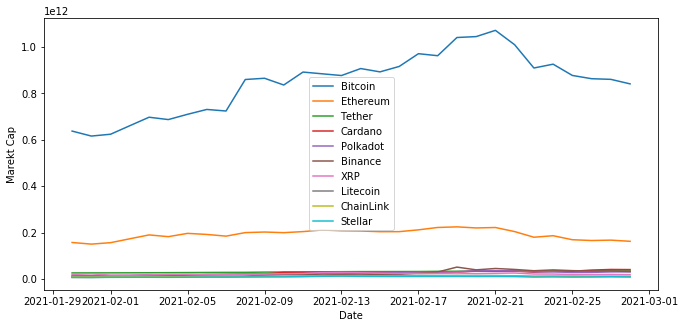

In [15]:
# Same as above, we can actually delete this
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
y8 = []
y9 = []
y10 = []
x= new_df['Date'].unique()
plt.rcParams["figure.figsize"] = (11,5)

for i in range(len(new_df['Crypto'])):
    if new_df.iloc[i,0] == 'Bitcoin':
        y1.append(new_df.iloc[i,7])
    elif new_df.iloc[i,0] == 'Ethereum':
        y2.append(new_df.iloc[i,7])
    elif new_df.iloc[i,0] == 'Tether':
        y3.append(new_df.iloc[i,7])
    elif new_df.iloc[i,0] == 'Cardano':
        y4.append(new_df.iloc[i,7])
    elif new_df.iloc[i,0] == 'Polkadot':
        y5.append(new_df.iloc[i,7])
    elif new_df.iloc[i,0] == 'Binance':
        y6.append(new_df.iloc[i,7])
    elif new_df.iloc[i,0] == 'XRP':
        y7.append(new_df.iloc[i,7])
    elif new_df.iloc[i,0] == 'Litecoin':
        y8.append(new_df.iloc[i,7])
    elif new_df.iloc[i,0] == 'ChainLink':
        y9.append(new_df.iloc[i,7])
    else:
        y10.append(new_df.iloc[i,7])

plt.plot(x,y1,label = 'Bitcoin')
plt.plot(x,y2,label = 'Ethereum')
plt.plot(x,y3,label = 'Tether')
plt.plot(x,y4,label = 'Cardano')
plt.plot(x,y5,label = 'Polkadot')
plt.plot(x,y6,label = 'Binance')
plt.plot(x,y7,label = 'XRP')
plt.plot(x,y8,label = 'Litecoin')
plt.plot(x,y9,label = 'ChainLink')
plt.plot(x,y10,label = 'Stellar')
plt.xlabel('Date')
plt.ylabel('Marekt Cap')
plt.legend()
plt.show()
#plt.plot(new_df['Date'],new_df['Market Cap'],)

Text(0.5, 1.0, 'Volume of most recent month')

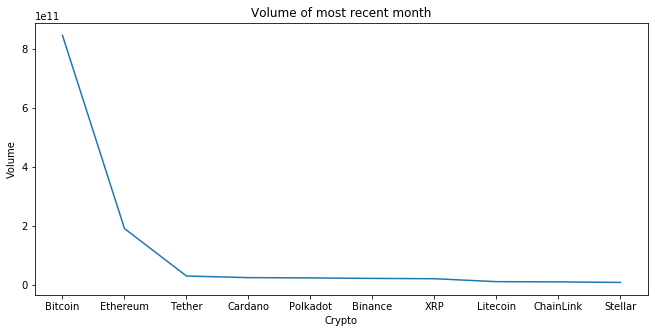

In [16]:
# The plot between avg volume and cryptos
avg_volume = crypto_group['Volume'].agg(np.mean)
avg_volume = avg_market.sort_values(ascending = False)
plt.plot(avg_volume)
plt.rcParams["figure.figsize"] = (11,10)
plt.xlabel('Crypto')
plt.ylabel('Volume')
plt.title('Volume of most recent month')

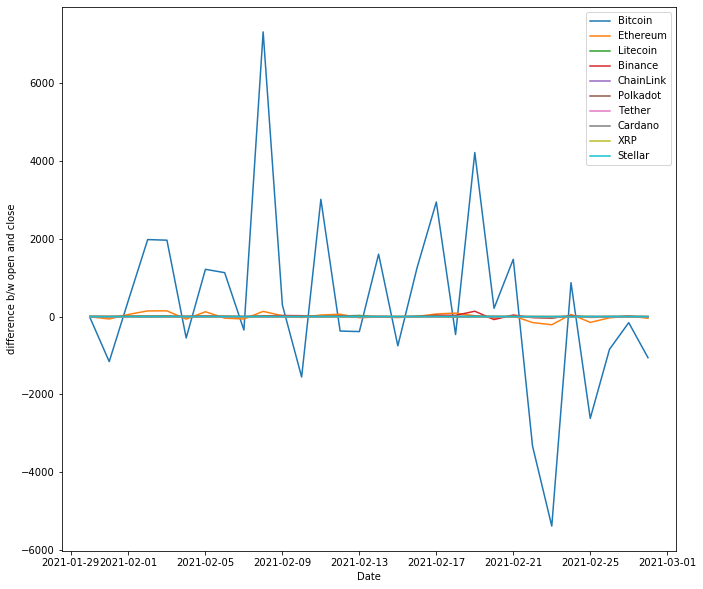

In [17]:
# The plot between the open,close difference and dates with respect to all crypto coins
x= new_df['Date'].unique()
crypto = ['Bitcoin','Ethereum', 'Litecoin','Binance','ChainLink','Polkadot','Tether','Cardano','XRP','Stellar']

for i in range(len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            d = new_df.iloc[j,5] - new_df.iloc[j,2]           
            y.append(d)
    
    plt.plot(x,y,label=crypto[i])    

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('difference b/w open and close')
plt.legend()
plt.show()    

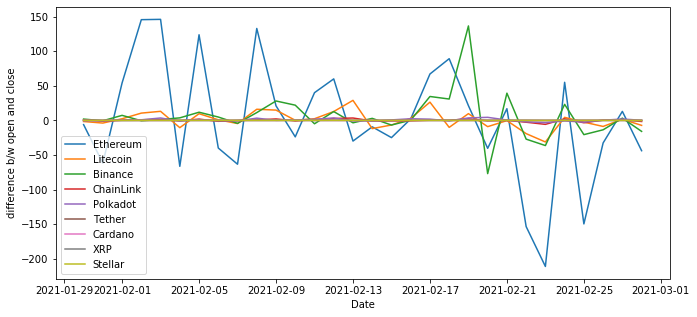

In [18]:
# The plot between open, close difference and the dates wrt to coins except bitcoin
x= new_df['Date'].unique()
crypto = ['Bitcoin','Ethereum', 'Litecoin','Binance','ChainLink','Polkadot','Tether','Cardano','XRP','Stellar']

for i in range(1,len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            d = new_df.iloc[j,5] - new_df.iloc[j,2]
            
            y.append(d)
    
    plt.plot(x,y,label=crypto[i])    

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('difference b/w open and close')
plt.legend()
plt.show()

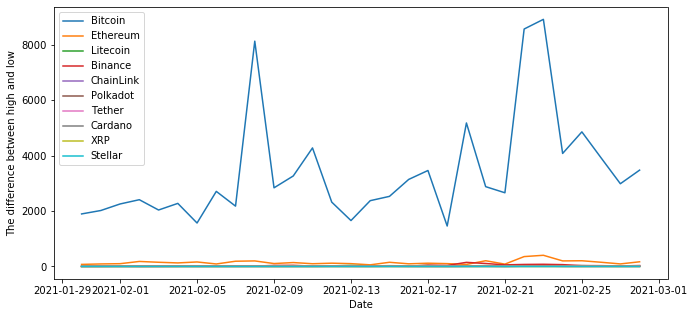

In [19]:
# the plot between the high,low difference and dates wrt crypto coins
x= new_df['Date'].unique()
crypto = ['Bitcoin','Ethereum', 'Litecoin','Binance','ChainLink','Polkadot','Tether','Cardano','XRP','Stellar']

for i in range(len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            d = new_df.iloc[j,4] - new_df.iloc[j,3]            
            y.append(d)
    
    plt.plot(x,y,label=crypto[i])    

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('The difference between high and low')
plt.legend()
plt.show()

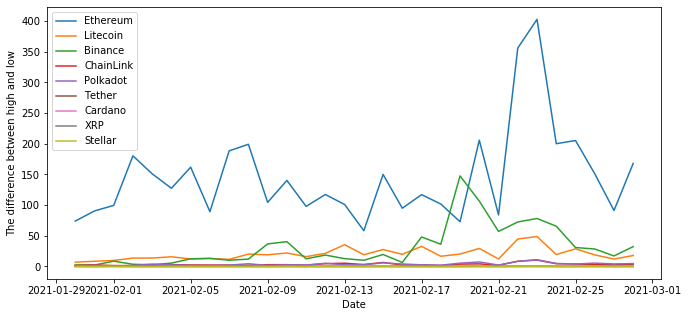

In [20]:
# the plot between the high,low difference and dates wrt crypto coins execpt bitcoin
x= new_df['Date'].unique()
crypto = ['Bitcoin','Ethereum', 'Litecoin','Binance','ChainLink','Polkadot','Tether','Cardano','XRP','Stellar']

for i in range(1,len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            d = new_df.iloc[j,4] - new_df.iloc[j,3]            
            y.append(d)
            
    
    plt.plot(x,y,label=crypto[i])    

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('The difference between high and low')
plt.legend()
plt.show()

In [22]:
crypto = ['Bitcoin','Ethereum', 'Litecoin','Binance','ChainLink','Polkadot','Tether','Cardano','XRP','Stellar']
MarketCap_Percent = 0 
Volume_Percent = 0 
Open_Percent = 0
Close_Percent = 0
High_Percent = 0
Low_Percent = 0
sum_marketcap = []
sum_volume = []
sum_high = []
sum_low = []
sum_close = []
sum_open = []

'''
bitcoin_market = new_df.loc[new_df['Crypto'] == 'Bitcoin', 'Market Cap'].sum()
bitcoin_volume = new_df.loc[new_df['Crypto'] == 'Bitcoin', 'Volume'].sum()

bitcoin_high = new_df.loc[new_df['Crypto'] == 'Bitcoin', 'High'].sum()
bitcoin_low = new_df.loc[new_df['Crypto'] == 'Bitcoin', 'Low'].sum()

bitcoin_close = new_df.loc[new_df['Crypto'] == 'Bitcoin', 'Close'].sum()
bitcoin_open = new_df.loc[new_df['Crypto'] == 'Bitcoin', 'Open'].sum()
'''


for i in range(len(crypto)):
    for j in range(len(new_df['Crypto'])):
        sum_marketcap.append(new_df.loc[ new_df['Crypto'] == crypto[i], 'Market Cap'].sum())
        sum_volume.append(new_df.loc[ new_df['Crypto'] == crypto[i], 'Volume'].sum())
        sum_high.append(new_df.loc[ new_df['Crypto'] == crypto[i], 'High'].sum())
        sum_low.append(new_df.loc[ new_df['Crypto'] == crypto[i], 'Low'].sum())
        sum_close.append(new_df.loc[ new_df['Crypto'] == crypto[i], 'Close'].sum())
        sum_open.append(new_df.loc[ new_df['Crypto'] == crypto[i], 'Open'].sum())


#print(sum_marketcap[0])
#print(bitcoin_market)